# Computer Vision

## Libraries
* torchvision - base domain library for computer vision
* torchvision.datasets - get datasets and data loading functions
* torchvision.models - pretrained models
* torchvision.transforms - manipulate data to make it suitable for the model
* torch.utils.data.Dataset - base dataset class
* torch.utils.data.DataLoader - creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 1. Data
Fashion MNIST

In [2]:
# training data
train_data = datasets.FashionMNIST(
  root="data", # where to download
  train=True,
  download=True,
  transform=ToTensor(), # transform the data
  target_transform=None # transform labels
)

test_data = datasets.FashionMNIST(
  root="data",
  train=False,
  download=True,
  transform=ToTensor(),
  target_transform=None
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check data shapes

In [11]:
print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing the data

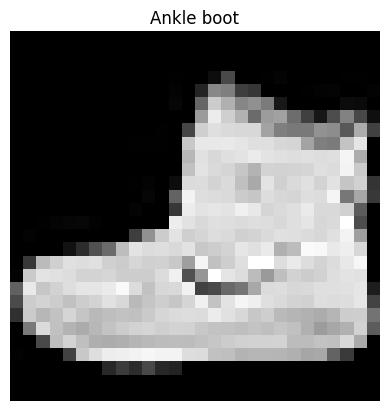

In [16]:
# plt.imshow(image.reshape(28,28,1));
plt.imshow(image.squeeze(), cmap='gray');
plt.title(class_names[label]);
plt.axis(False);

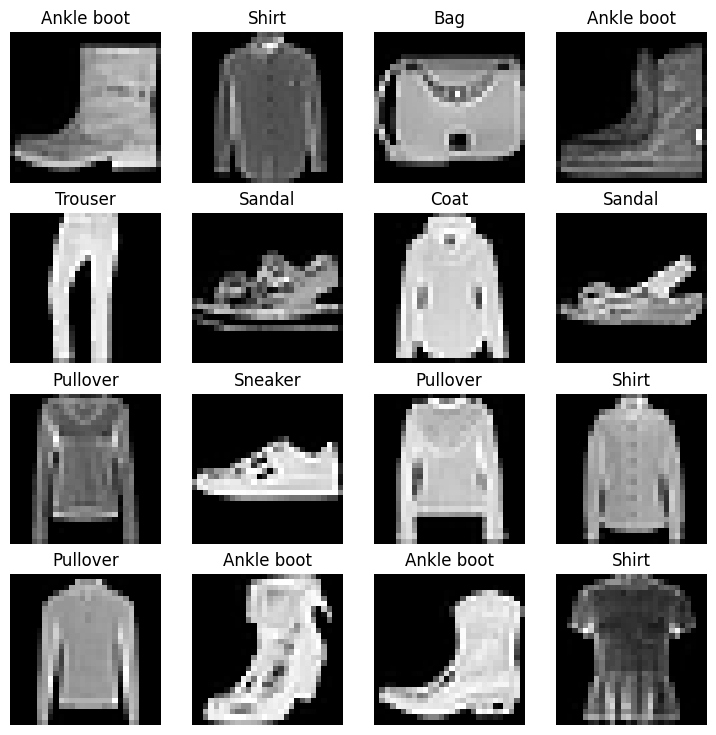

In [17]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False )

## 2. Prepare DataLoader

Load data in minibatches by converting it from a dataset to an iterable.

* More computationally efficient (cannot store all 60k images in memory).
* It gives our neural network to update its gradients per epoch.

In [18]:
from torch.utils.data import DataLoader

# popular batch size
BATCH_SIZE = 32

# turn dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd0402ee440>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd0402ed930>)

In [19]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} with batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} with batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fd0402ee440>, <torch.utils.data.dataloader.DataLoader object at 0x7fd0402ed930>)
Length of train dataloader: 1875 with batches of 32
Length of test dataloader: 313 with batches of 32


In [20]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6


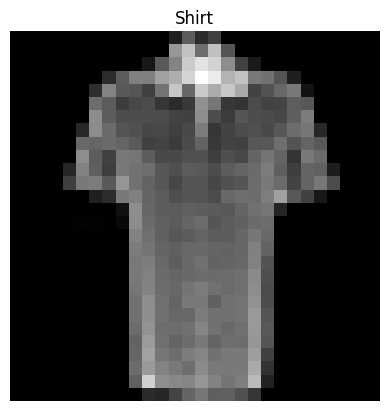

In [22]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_labels_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}")

## 3. Baseline model 

In [24]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [25]:
# flatten the sample
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [27]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  
  def forward(self, x):
    return self.layer_stack(x)
  
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=784,  hidden_units=10, output_shape=10)

model_0.to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [28]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Loss, optimizer, and evaluation metrics

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
from helper_functions import accuracy_fn


### 3.2 Time experiments

In [30]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


1.3124896213412285e-05

### 3.3 Creating a training loop with batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate training loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Time it.

In [35]:
from tqdm.auto import tqdm

# set seed and start time
torch.manual_seed(42)
train_time_start = timer()

# set epochs
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    
    # 2. Calculate loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backpropogation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader to get average loss per epoch
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # calc loss
      test_loss = loss_fn(test_pred, y_test)

      # calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # find logit value with highest index to get prediction label
    
    # calculate the test loss average per batch per epoch
    test_loss /= len(test_dataloader)

    # calc the test acc average per batch per epoch
    test_acc /= len(test_dataloader)

  # print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# calculate training time
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start, end=train_time_end, device=str(next(model_0.parameters()).device))
  

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:06<00:13,  6.87s/it]


Train loss: 0.5051 | Test loss: 0.0010, Test acc: 82.5978
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:13<00:06,  6.61s/it]


Train loss: 0.4660 | Test loss: 0.0009, Test acc: 83.4665
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:19<00:00,  6.62s/it]


Train loss: 0.4499 | Test loss: 0.0011, Test acc: 83.5064
Train time on cpu: 19.873 seconds


## 4. Evaluate baseline model results

In [49]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # make preds
      y_pred = model(X)

      # accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    
    # scale loss and acc to find averages per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created as a class
          "model_loss": loss.item(),
          "model_acc": acc}

    

In [50]:
# calc model 0 results on test dataset
model_0_results  = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 461.94it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47455447912216187,
 'model_acc': 83.50638977635782}

## 5. Set up device-agnostic code

In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6. Nonlinear model

In [52]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_shape),
      nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [53]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=10).to(device)
model_1, next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cpu'))

### 6.1 Loss, optimizer and evaluation metrics

In [54]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionize training and testing

In [55]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer,
               accuracy_fn, device: torch.device=device):
  """Performs training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0
  model.train()
  # put data on target device
  
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # forward pass outputs raw logits
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # logits -> labels
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
  

def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn, device: torch.device=device):
  """Performs testing with model on data_loader"""
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      # forward pass
      test_pred = model(X)

      # calc loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # adjust metrics and print them out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



In [56]:
torch.manual_seed(42)
train_time_start = timer()
epochs = 3

# optimization and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start, end=train_time_end, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:07<00:14,  7.49s/it]

Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
-----
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:14<00:07,  7.38s/it]

Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
-----
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:21<00:00,  7.15s/it]

Test loss: 0.68500 | Test acc: 75.02%
Train time on cpu: 21.460 seconds


In [57]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 459.41it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## 7. Model 2: CNN

In [102]:
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from the CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )
  
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output of conv block 2: {x.shape}")
    return self.classifier(x)

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10).to(device)
model_2
                

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping thorugh the Conv2d layer

In [103]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [104]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [105]:
# create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [106]:
test_image.unsqueeze(0).shape, conv_output.shape

(torch.Size([1, 3, 64, 64]), torch.Size([10, 62, 62]))

### 7.2 Stepping through the MaxPool2d layer

In [107]:
# print out unsqueezed image shape
print(f"Test image og shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# sample max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after conv layer: {test_image_conv.shape}")

# pass data through max pool layer
test_image_max = max_pool_layer(test_image_conv)
print(f"Test image shape after max and conv: {test_image_max.shape}")

Test image og shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after conv layer: torch.Size([1, 10, 62, 62])
Test image shape after max and conv: torch.Size([1, 10, 31, 31])


In [108]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor)
max_pool_layer(random_tensor), max_pool_layer(random_tensor).shape

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])


(tensor([[[[0.3367]]]]), torch.Size([1, 1, 1, 1]))

In [109]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [110]:
output = model_2(rand_image_tensor.unsqueeze(0).to(device))
output, output.shape

(tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
          -0.0158, -0.0177]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

### 7.3 Set up loss function and optimizer

In [111]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing model 2

In [112]:
torch.manual_seed(42)
from timeit import default_timer as Timer
epochs = 3
train_time_start_model_2 = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.59710 | Train acc: 78.30%


 33%|███▎      | 1/3 [00:58<01:56, 58.29s/it]

Test loss: 0.39374 | Test acc: 85.84%
Epoch: 1
-----
Train loss: 0.36045 | Train acc: 87.11%


 67%|██████▋   | 2/3 [01:54<00:57, 57.13s/it]

Test loss: 0.35556 | Test acc: 86.93%
Epoch: 2
-----
Train loss: 0.32317 | Train acc: 88.38%


100%|██████████| 3/3 [02:51<00:00, 57.14s/it]

Test loss: 0.31702 | Test acc: 88.39%
Train time on cpu: 171.416 seconds


In [113]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

100%|██████████| 313/313 [00:03<00:00, 86.60it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31701502203941345,
 'model_acc': 88.38857827476038}

In [114]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47455447912216187,
 'model_acc': 83.50638977635782}

## 8. Compare model results and training time

In [115]:
import pandas as pd
compare_results = pd.DataFrame([
  model_0_results, model_1_results, model_2_results
])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.474554,83.506390
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.317015,88.388578


In [116]:
# add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.474554,83.506390,19.873150
1,FashionMNISTModelV1,0.685001,75.019968,21.460248
2,FashionMNISTModelV2,0.317015,88.388578,171.416184


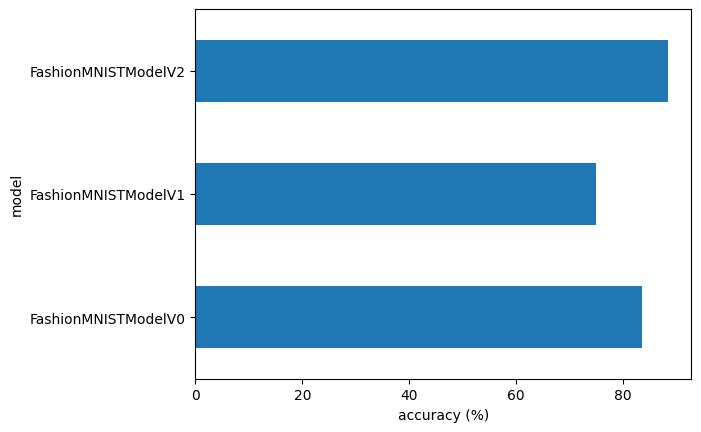

In [118]:
# visualize model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with the best model

In [119]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare sample by adding batch dimension
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass outputs raw logits
      pred_logit = model(sample)
      
      # get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off the GPU
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)

In [121]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [123]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

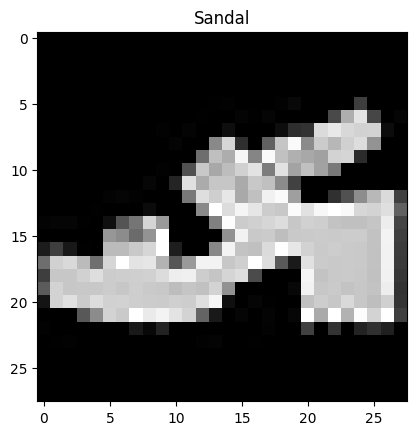

In [125]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [128]:
# make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# view first two prediction probabilities
pred_probs[:2]

tensor([[1.4027e-08, 1.9556e-09, 2.6958e-09, 7.5425e-09, 9.8951e-10, 9.9998e-01,
         3.0406e-09, 6.8013e-07, 4.2555e-06, 1.5977e-05],
        [7.0297e-02, 4.3365e-01, 1.4391e-03, 4.6068e-02, 9.5866e-02, 1.0734e-04,
         3.5239e-01, 3.9265e-05, 8.0083e-05, 6.7755e-05]])

In [130]:
# convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

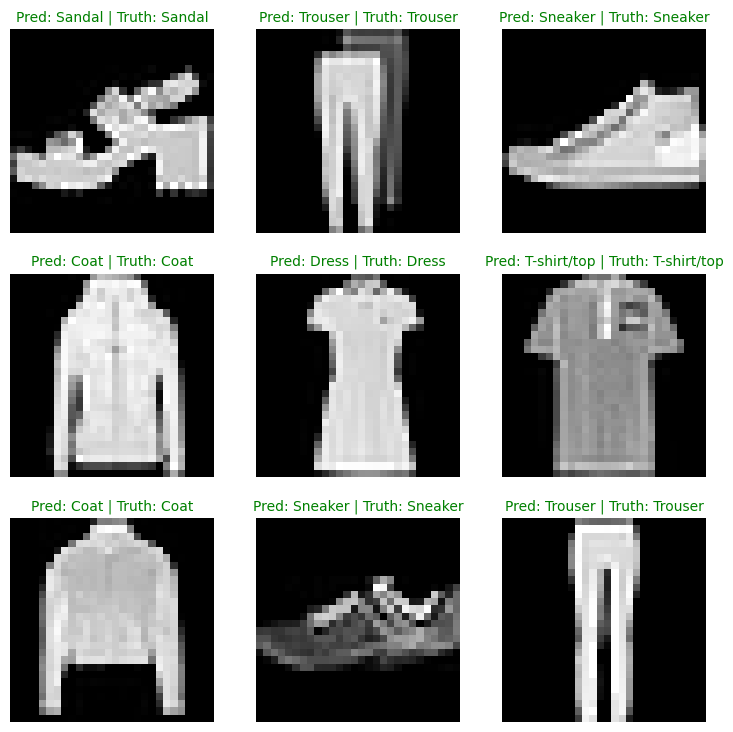

In [133]:
# plot predictions
plt.figure(figsize=(9, 9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # find the prediction label in text form
  pred_label = class_names[pred_classes[i]]

  # get the truth label in text form
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # color title text based on correctness
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False)

## 10. Confusion matrix
1. Make predictions with trained model on test dataset
2. Make confusion matrix with `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`

In [136]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions...'):
    # send data and targets to target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

# concatenate lis of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor.shape


Making predictions...: 100%|██████████| 313/313 [00:03<00:00, 85.30it/s]


torch.Size([10000])

In [138]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [140]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=10)
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
confmat_tensor

tensor([[604,   6,  56,  61,  13,   1, 250,   0,   9,   0],
        [ 11, 869,   9,  91,  11,   0,   7,   0,   2,   0],
        [  8,   2, 813,  11, 105,   0,  56,   0,   5,   0],
        [ 24,   9,  42, 848,  39,   0,  34,   0,   3,   1],
        [  3,   6, 128,  45, 707,   0, 108,   0,   3,   0],
        [  8,   2,   4,   8,   1, 836,   3,  58,  62,  18],
        [ 68,   6, 129,  58,  90,   0, 640,   0,   9,   0],
        [  1,   1,   0,   0,   0,  24,   0, 911,  11,  52],
        [  8,   1,  27,  18,  12,   6,  30,   7, 890,   1],
        [  0,   0,   0,   3,   0,  17,   5,  89,  14, 872]])

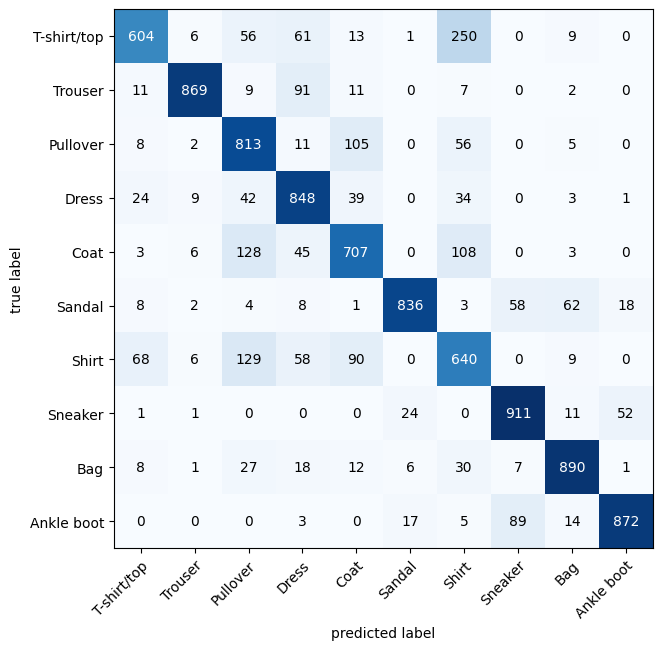

In [141]:
# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
  conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
  class_names=class_names,
  figsize=(10,7)
)

## 11. Save and load a model

In [146]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "cnn_03.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/cnn_03.pth


In [147]:
torch.manual_seed(42)

# create a new instance 
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10)

# load in the saved state_dict
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

# send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [149]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
  model=loaded_model_2,
  data_loader=test_dataloader,
  loss_fn=loss_fn,
  accuracy_fn=accuracy_fn
)
model_2_results, loaded_model_2_results

100%|██████████| 313/313 [00:04<00:00, 77.57it/s]


({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.31701502203941345,
  'model_acc': 88.38857827476038},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.31701502203941345,
  'model_acc': 88.38857827476038})

In [151]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-8)

tensor(True)